In [10]:
import numpy as np
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
import pymongo
import ipywidgets as wgt
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
import re
from datetime import datetime


In [11]:
!pip install tweepy
!pip install pymongo

In [12]:
!pip install ipywidgets

In [1]:
import numpy as np
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
import pymongo
import ipywidgets as wgt
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
import re
from datetime import datetime
%matplotlib inline

In [2]:
api_key = "pCRLPdf2lkjpRX9Uczpt2gVBb" # <---- Add your API Key
api_secret = "G1Wv7sTLMYF3cr5LbL8S9uj2g2LFrdWp8X8t7Ft3sIpW0kbqgD" # <---- Add your API Secret
access_token = "100875722-7m5vhOzpw2LYrB7P8ISnTqtGYMMvVTqwx3X4EyJY" # <---- Add your access token
access_token_secret = "uPEymGiszhiJEVWD4Alo1pzMUJx1ymo3Fd4HWyRPRBN3r" # <---- Add your access token secret

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)
col = pymongo.MongoClient()["newtwitter"]["newnew"]
col.count()

C:\Users\shuei\miniconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  # This is added back by InteractiveShellApp.init_path()


0

In [3]:
class MyStreamListener(tweepy.StreamListener):
    
    counter = 0
    
    def __init__(self, max_tweets=5000, *args, **kwargs):
        self.max_tweets = max_tweets
        self.counter = 0
        super().__init__(*args, **kwargs)
    
    def on_connect(self):
        self.counter = 0
        self.start_time = datetime.now()
    
    def on_status(self, status):
        # Increment counter
        self.counter += 1
        
        # Store tweet to MongoDB
        col.insert_one(status._json)
        
        
        if self.counter % 1 == 0:
            value = int(100.00 * self.counter / self.max_tweets)
            mining_time = datetime.now() - self.start_time
            progress_bar.value = value
            html_value = """<span class="label label-primary">Tweets/Sec: %.1f</span>""" % (self.counter / max([1,mining_time.seconds]))
            html_value += """ <span class="label label-success">Progress: %.1f%%</span>""" % (self.counter / self.max_tweets * 100.0)
            html_value += """ <span class="label label-info">ETA: %.1f Sec</span>""" % ((self.max_tweets - self.counter) / (self.counter / max([1,mining_time.seconds])))
            wgt_status.value = html_value
            #print("%s/%s" % (self.counter, self.max_tweets))
            if self.counter >= self.max_tweets:
                myStream.disconnect()
                print("Finished")
                print("Total Mining Time: %s" % (mining_time))
                print("Tweets/Sec: %.1f" % (self.max_tweets / mining_time.seconds))
                progress_bar.value = 0
                
    
myStreamListener = MyStreamListener(max_tweets=5000)
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)
keywords = ["BMW",
            "TOYOTA",
            "Honda",
            "Volvo",
            "Tesla",
           ]

# Visualize a progress bar to track progress
progress_bar = wgt.IntProgress(value=0)
display(progress_bar)
wgt_status = wgt.HTML(value="""<span class="label label-primary">Tweets/Sec: 0.0</span>""")
display(wgt_status)

# Start a filter with an error counter of 20
for error_counter in range(20):
    try:
        myStream.filter(track=keywords)
        print("Tweets collected: %s" % myStream.listener.counter)
        print("Total tweets in collection: %s" % col.count())
        break
    except:
        print("ERROR# %s" % (error_counter + 1))


IntProgress(value=0)

HTML(value='<span class="label label-primary">Tweets/Sec: 0.0</span>')

Finished
Total Mining Time: 0:55:35.646342
Tweets/Sec: 1.5
Tweets collected: 5000
Total tweets in collection: 5000


C:\Users\shuei\miniconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:59: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere


In [7]:

col.find_one()

{'_id': ObjectId('5f82d8234c10ac75d645d432'),
 'created_at': 'Sun Oct 11 10:02:06 +0000 2020',
 'id': 1315231191352532992,
 'id_str': '1315231191352532992',
 'text': 'RT @hansvii_: Driver myvi tu perempuan melayu, positif dadah. Doc bagitahu dia hilang ingatan kejap, tapi sempat bukak fb deactive account.…',
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 3188223858,
  'id_str': '3188223858',
  'name': 'IL 🇲🇾',
  'screen_name': 'thisismirfan',
  'location': 'Selangor, Malaysia',
  'url': None,
  'description': 'If I lose you, I would have a hole in my heart',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 498,
  'friends_count': 503,
  'listed_count': 10,
  'favourites_count': 3268,
  'statu

In [8]:

dataset = [{"created_at": item["created_at"],
            "text": item["text"],
            "user": "@%s" % item["user"]["screen_name"],
            "source": item["source"],
            "lang":item["lang"],
            
           } for item in col.find()]

dataset = pd.DataFrame(dataset)
dataset

,created_at,text,user,source,lang
0,Sun Oct 11 10:02:06 +0000 2020,"RT @hansvii_: Driver myvi tu perempuan melayu,...",@thisismirfan,"<a href=""http://twitter.com/download/android"" ...",in
1,Sun Oct 11 10:02:06 +0000 2020,RT @redzuanNewsMPB: Positif dadah\n\nPolis sah...,@Sreerajie,"<a href=""http://twitter.com/download/android"" ...",in
2,Sun Oct 11 10:02:07 +0000 2020,RT @tufangobekcin: Çevirmekten çok keyif aldığ...,@palomakitap,"<a href=""https://mobile.twitter.com"" rel=""nofo...",tr
3,Sun Oct 11 10:02:09 +0000 2020,"RT @hansvii_: Driver myvi tu perempuan melayu,...",@KBhensem,"<a href=""https://mobile.twitter.com"" rel=""nofo...",in
4,Sun Oct 11 10:02:09 +0000 2020,@RolandPierik @2 @Tesla https://t.co/qhrTlGFWZX,@GHEvers,"<a href=""https://mobile.twitter.com"" rel=""nofo...",und
...,...,...,...,...,...
4995,Sun Oct 11 10:57:37 +0000 2020,"RT @hansvii_: Driver myvi tu perempuan melayu,...",@yusakapergijauh,"<a href=""https://mobile.twitter.com"" rel=""nofo...",in
4996,Sun Oct 11 10:57:38 +0000 2020,"RT @hansvii_: Driver myvi tu perempuan melayu,...",@lieyazul,"<a href=""http://twitter.com/download/iphone"" r...",in
4997,Sun Oct 11 10:57:39 +0000 2020,Después de ver eso el dueño de Tesla debe de l...,@JovannyMejia16,"<a href=""http://twitter.com/download/android"" ...",es
4998,Sun Oct 11 10:57:39 +0000 2020,https://t.co/pEETxLcEqC,@6SMA_,"<a href=""http://twitter.com/download/iphone"" r...",und


In [9]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(dataset.text)

word_count = pd.DataFrame(cv.get_feature_names(), columns=["word"])
word_count["count"] = count_matrix.sum(axis=0).tolist()[0]
word_count = word_count.sort_values("count", ascending=False).reset_index(drop=True)
word_count[:50]

,word,count
0,rt,3615
1,myvi,1678
2,https,1654
3,dadah,1563
4,co,1560
5,positif,1553
6,tu,1449
7,driver,1433
8,hilang,1248
9,dia,1216


C:\Users\shuei\miniconda3\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


Instagram                13
DealerK                  13
dlvr.it                  16
twittbot.net             18
WordPress.com            18
TweetDeck                22
Twitter for iPad         74
Twitter Web App         563
Twitter for Android    2045
Twitter for iPhone     2067
Name: source, dtype: int64

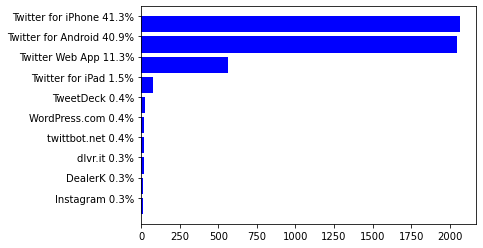

In [10]:
def get_source_name(x):
    value = re.findall(pattern="<[^>]+>([^<]+)</a>", string=x)
    if len(value) > 0:
        return value[0]
    else:
        return ""
dataset.source_name = dataset.source.apply(get_source_name)

source_counts = dataset.source_name.value_counts().sort_values()[-10:]

bottom = [index for index, item in enumerate(source_counts.index)]
plt.barh(bottom, width=source_counts, color="blue", linewidth=0)

y_labels = ["%s %.1f%%" % (item, 100.0*source_counts[item]/len(dataset)) for index,item in enumerate(source_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)

source_counts

el       38
nl       50
de       90
und     108
es      140
tr      183
fr      312
ja      372
en     1313
in     2124
Name: lang, dtype: int64

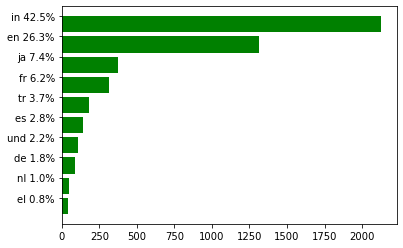

In [11]:

lang_counts = dataset.lang.value_counts().sort_values()[-10:]
bottom = [index for index, item in enumerate(lang_counts.index)]
plt.barh(bottom, width=lang_counts, color="green", linewidth=0)
y_labels = ["%s %.1f%%" % (item, 100.0*lang_counts[item]/len(dataset)) for index,item in enumerate(lang_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)
lang_counts

In [12]:
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt


In [13]:
dataset1 = [{"id": item["id"],
            "text": item["text"],
            "lang":item["lang"],
            
           } for item in col.find()]

dataset1 = pd.DataFrame(dataset1)
is_dataset1=dataset1.lang=="en"
dataset1=dataset1[is_dataset1]
dataset1

,id,text,lang
14,1315231233790492673,@Alfa_i_am @nyoni77 @OMotsiri @Cellular_ZA Nah...,en
16,1315231245509427200,RT @OtsileJK: Dang! 😲\n\nThe new Toyota Hilux ...,en
19,1315231247782739969,Tesla accuses employee of Californian factory ...,en
20,1315231258281152514,This is Nigerian calling for our so called Gov...,en
32,1315231299611762688,RT @GazTankMotors: Can he even drive without h...,en
...,...,...,...
4959,1315245056501010432,Check out Rare JDM Honda Civic EG Genuine 5MT ...,en
4962,1315245062826217477,"@GwailoMD But Apple, Microsoft, Google, Tesla,...",en
4972,1315245089967529984,RT @elonmusk: @Erdayastronaut @flcnhvy @PelleB...,en
4976,1315245109852725251,@page13dbr @LandRover_UK @LandRover Volvo do c...,en


In [14]:
!pip install textblob

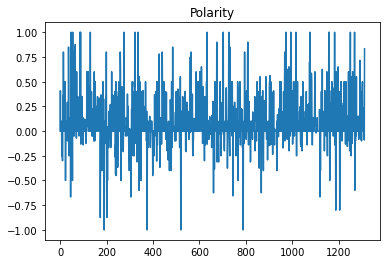

In [15]:

from  textblob import TextBlob
tweettext=dataset1['text']
wordlist=pd.DataFrame();

polarity=[]
subj=[]

for t in tweettext:
    tx= TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)

poltweet= pd.DataFrame({'polarity':polarity,'subjectivity':subj})
poltweet.polarity.plot(title='Polarity')
plt.show()

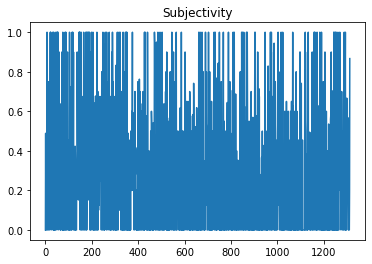

In [16]:

poltweet.subjectivity.plot(title='Subjectivity')
plt.show()

In [17]:

import statistics
statistics.mean(poltweet.polarity)

0.08200665501157575

In [20]:

import statistics
statistics.mean(poltweet.subjectivity)

0.31318246602766786

In [27]:
da_Honda=dataset1[dataset1['text'].str.contains('honda')]
da_tesla=dataset1[dataset1['text'].str.contains('tesla')]
da_bmw=dataset1[dataset1['text'].str.contains('bmw')]
da_toyota=dataset1[dataset1['text'].str.contains('toyota')]
da_volvo=dataset1[dataset1['text'].str.contains('volvo')]

In [28]:
da_Honda

,id,text,lang
178,1315231692785963015,RT @vmstagemom: who is doing it like marin hon...,en
354,1315232195741589504,RT @gwendalsflow: if marin honda ad-libbing pr...,en
525,1315232612672184326,RT @zdravkost: Jenson Button 🇬🇧 (BAR 006 - Hon...,en
531,1315232623896096768,RT @zehar_ka_teeka_: Aaja dassey ten Soneya ni...,en
956,1315233834229669889,RT @zehar_ka_teeka_: Aaja dassey ten Soneya ni...,en
1169,1315234481339420672,#hondaactiva @hondaindia This man has been rid...,en
1254,1315234736420265985,RT @zehar_ka_teeka_: Aaja dassey ten Soneya ni...,en
1415,1315235273056219137,RT @vmstagemom: who is doing it like marin hon...,en
1437,1315235340236464128,@g00dm0aning honda beat,en
1597,1315235850561544195,RT @zehar_ka_teeka_: Aaja dassey ten Soneya ni...,en


In [29]:
da_tesla

,id,text,lang
559,1315232696054939650,RT @teslaownersSV: “Tesla is the most fun thin...,en
852,1315233520415961088,@tesla \n“I don’t care that they stole my idea...,en
996,1315233960125890560,@preciou89944432 @cnn @KDVR @NPR @denverpost @...,en
1304,1315234866946953217,@elonmusk https://t.co/M6DIHFz1Ho can we do th...,en
1354,1315235073625481217,@rjo71342 @AEVA_National @Ahead_of_Curve @robr...,en
1807,1315236417287593984,"@ClarkeMicah The turbines have there place, bu...",en
1870,1315236612863795202,Tesla has installed a large supercharging stat...,en
1897,1315236720326004736,RT @teslaownersSV: “Tesla is the most fun thin...,en
1989,1315236974547005440,@elonmusk plz lauch tesla in India at India Ga...,en
2046,1315237134274490371,@JC6937 @BernardKerik Not only 2 lots of rich ...,en


In [30]:
da_bmw

,id,text,lang
32,1315231299611762688,RT @GazTankMotors: Can he even drive without h...,en
248,1315231871098392576,@SheLoveThaDreds Lol 😂 I forgot you have a bmw,en
387,1315232273210339328,23 bmw i8 drawing carstoon concept Canvas Prin...,en
904,1315233690155278336,So this is me for the next 3 and a half hours....,en
1314,1315234893924691968,@mediocregandhi These r our keyboard anti nati...,en
2612,1315238779142037506,@Firdausysof target bmw i8,en
2910,1315239528232222720,"My girl is a bmw hun, I’m disgusted",en
3212,1315240323396726785,RT @bmwindia: @beinglucky99 Thanks for your in...,en
3480,1315241076245004289,You niggas be outta order lmfao... how you wea...,en
3625,1315241498653478912,RT @GrgoryR: My artwork \n#rally #bmw #wrc @BM...,en


In [31]:
da_toyota

,id,text,lang
415,1315232329086902276,My modest dream car is a toyota MR2,en
2967,1315239668842078210,TOYOTA GAZOO Racing at Goodwood Speedweek http...,en
4647,1315244214561763330,@PearlModiadie This Pram can get me a toyota t...,en


In [32]:
da_volvo

,id,text,lang
909,1315233711202287617,Mere compliance will not win the day..\n\nCome...,en
1702,1315236119655530497,RT @motionarabia: Next #Volvo #XC90 Likely The...,en
3614,1315241453984133121,@AlextheLyons @adamcooperF1 @BTCC I perfered r...,en


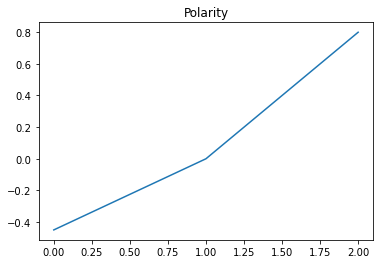

In [51]:
#volvo

from  textblob import TextBlob
tweettext5=da_volvo['text']
wordlist=pd.DataFrame();

polarity=[]
subj=[]

for t in tweettext5:
    tx= TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)

poltweet5= pd.DataFrame({'polarity':polarity,'subjectivity':subj})
poltweet5.polarity.plot(title='Polarity')
plt.show()

#volvo

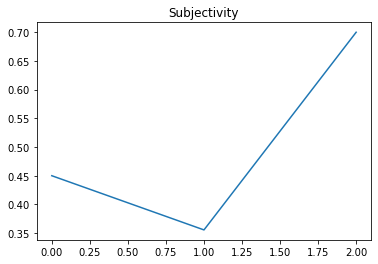

In [52]:
poltweet5.subjectivity.plot(title='Subjectivity')
plt.show()

In [72]:
import statistics
statistics.mean(poltweet5.polarity)

0.11666666666666668

In [73]:
import statistics
statistics.mean(poltweet5.subjectivity)

0.5018518518518519

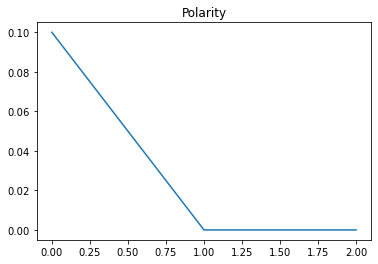

In [56]:
#toyota

from  textblob import TextBlob
tweettext4=da_toyota['text']
wordlist=pd.DataFrame();

polarity=[]
subj=[]

for t in tweettext4:
    tx= TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)

poltweet4= pd.DataFrame({'polarity':polarity,'subjectivity':subj})
poltweet4.polarity.plot(title='Polarity')
plt.show()


#Toyota

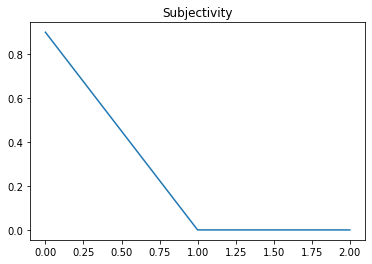

In [54]:
poltweet4.subjectivity.plot(title='Subjectivity')
plt.show()

In [70]:
import statistics
statistics.mean(poltweet4.polarity)

0.03333333333333333

In [71]:

import statistics
statistics.mean(poltweet4.subjectivity)

0.3

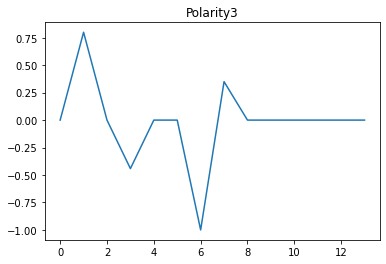

In [43]:
#bmw

tweettext3=da_bmw['text']
wordlist=pd.DataFrame();

polarity=[]
subj=[]

for t in tweettext3:
    tx= TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)

poltweet3= pd.DataFrame({'polarity':polarity,'subjectivity':subj})
poltweet3.polarity.plot(title='Polarity3')
plt.show()


#bmw

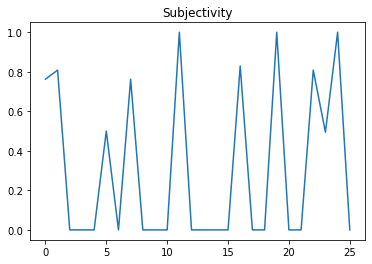

In [57]:
poltweet3.subjectivity.plot(title='Subjectivity')
plt.show()

In [74]:
import statistics
statistics.mean(poltweet3.polarity)

0.01201923076923077

In [75]:
import statistics
statistics.mean(poltweet3.subjectivity)

0.3063568376068376

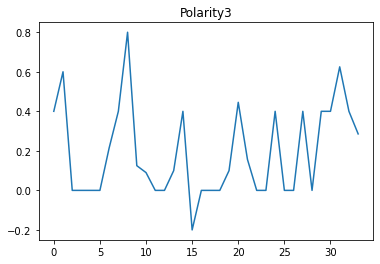

In [58]:
#tesla

tweettext2=da_tesla['text']
wordlist=pd.DataFrame();

polarity=[]
subj=[]

for t in tweettext2:
    tx= TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)

poltweet2= pd.DataFrame({'polarity':polarity,'subjectivity':subj})
poltweet2.polarity.plot(title='Polarity3')
plt.show()

#tesla

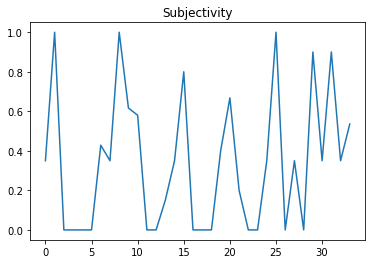

In [59]:
poltweet2.subjectivity.plot(title='Subjectivity')
plt.show()

In [76]:
import statistics
statistics.mean(poltweet2.polarity)

0.19240307486631017

In [77]:
import statistics
statistics.mean(poltweet2.subjectivity)

0.3420333587980647

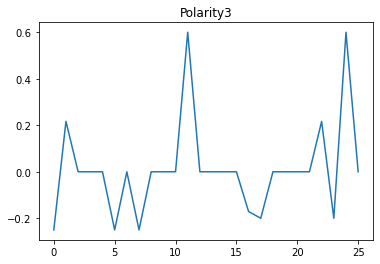

In [60]:
#honda

tweettext1=da_Honda['text']
wordlist=pd.DataFrame();

polarity=[]
subj=[]

for t in tweettext1:
    tx= TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)

poltweet1= pd.DataFrame({'polarity':polarity,'subjectivity':subj})
poltweet1.polarity.plot(title='Polarity3')
plt.show()


#honda

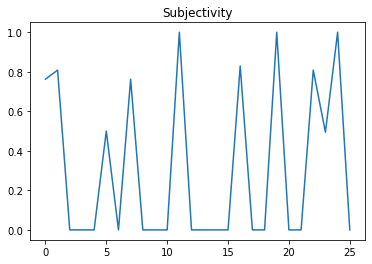

In [61]:
poltweet1.subjectivity.plot(title='Subjectivity')
plt.show()

In [78]:

import statistics
statistics.mean(poltweet1.polarity)

0.01201923076923077

In [79]:
import statistics
statistics.mean(poltweet1.subjectivity)

0.3063568376068376